In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF drive/My\ Drive/Colab\ Notebooks/"k_NN.ipynb"

In [29]:
import numpy as np
import pandas as pd
import operator, time
from matplotlib import pyplot as plt
from collections import Counter

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
path_to_train = '/content/drive/My Drive/zip.train'
path_to_test = '/content/drive/My Drive/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], (training_data[:,0])
X_test, y_test = test_data[:,1:], test_data[:,0]

[ k = 2 ] Accuracy: 94.36970602889886
[ k = 5 ] Accuracy: 93.62232187344294
[ k = 10 ] Accuracy: 92.12755356253113


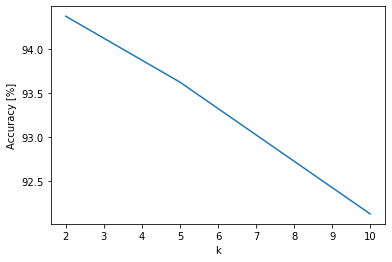

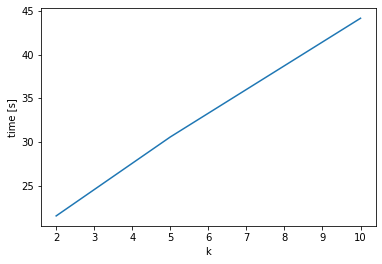

[ k = 1 ] Accuracy: 94.36970602889886
[ k = 5 ] Accuracy: 93.62232187344294
[ k = 10 ] Accuracy: 92.12755356253113
[ k = 15 ] Accuracy: 90.43348281016442
[ k = 20 ] Accuracy: 88.78923766816143
[ k = 25 ] Accuracy: 87.94220229197808
[ k = 35 ] Accuracy: 85.79970104633782
[ k = 45 ] Accuracy: 83.80667663178873
[ k = 55 ] Accuracy: 82.26208271051321
[ k = 70 ] Accuracy: 79.62132536123568
[ k = 85 ] Accuracy: 77.92725460886896
[ k = 100 ] Accuracy: 76.48231190832088
[ k = 110 ] Accuracy: 76.03388141504733
[ k = 125 ] Accuracy: 75.9840558046836
[ k = 150 ] Accuracy: 75.68510214250125
[ k = 200 ] Accuracy: 72.94469357249626


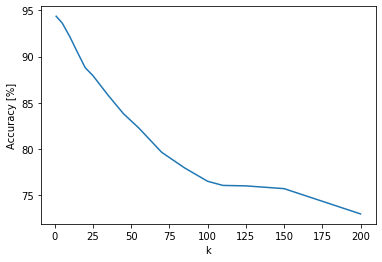

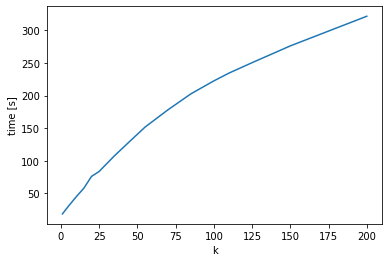

[ k = 3 ] Accuracy: 93.97110114598904
[ k = 5 ] Accuracy: 93.62232187344294
[ k = 17 ] Accuracy: 89.8355754857997


In [ ]:
class KNearestNeighbors():
    def smallNeighboursort(self, k, a) -> [(int,int)]:                              #Sorting Algorithm which returns only the nearest sorted k neighbors and indexes them
        z = []                                                                      #endresult
        for n in range(0,k):                                                        #indexing the first k numbers
            z.append((a[n],n))
        z = sorted(z)                                                               #sorting k numbers to improve efficiency a lot
        for n in range(k,len(a)):                                                   #if any number in a is smaller than z[i][0], replace z[i][0] with (a[n],n), else test z[i+1][0]
            for i in range(0,k):                                                    #(n = index)
                if (a[n]<z[i][0]):
                    z[i] = (a[n],n)
                    break                    
        return (z)
    
    def voteNeighbourhood(self, a) -> int:                                          #counts occurrences in a and returns max
        z = []
        for n in range(len(a)):
           z.append(y_train[a[n][1]])                                               #translates the returned indexes from indexsort to their respective number (y_train[index])
        d = Counter(z)
        if (len(d) == 1):
            return (z[0])     
        return (max(d.items(), key=operator.itemgetter(1))[0])

    def squared_euclidean_distance(self, x_1, x_2) -> [int]:
      return np.sum((x_1-x_2)**2, axis = 1)

    def acc_scan(self, a, ytest) -> float:                                          #tests the calculated image-numbers against their actual value (y_train[x])
        c = 0
        for n in range(len(ytest)):
            c += (1 if a[n] == ytest[n] else 0)
        return ((c/len(ytest))*100)

    def plotter(self, x, y, xlabel, ylabel):                                        #Just a plotting function to modulize it 
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def main_method(self, k = [2,5,10], train = X_train, test = X_test, pl_flag = 1):
        pl, t = [], []
        for i in k:
            timer = time.time() 
            r = []
            for n in range(len(X_test)):
                r.append(kNN.voteNeighbourhood(kNN.neighboursort(i, kNN.squared_euclidean_distance(train, test[n]))))
            acc = kNN.acc_scan(r, y_test)
            print ("[ k =", i, "] Accuracy:", acc)
            if (pl_flag == 1):
                pl.append(acc)
                t.append(time.time()-timer)
        if (pl_flag == 1):
            kNN.plotter(k, pl, 'k', 'Accuracy [%]')
            kNN.plotter(k, t, 'k', 'Runtime [s]')

kNN = KNearestNeighbors()
kNN.main_method()  
kNN.main_method([1,5,10,15,20,25,35,45,55,70,85,100,110,125,150,175,200])
kNN.main_method([3,5,17], X_train, X_test, 0)
       